<a href="https://colab.research.google.com/github/shivamsunny21/IPL-PREDICTOR-AML-PROJECT-/blob/main/IPL_PREDICTOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import files


In [ ]:
uploaded = files.upload()

Saving matches.csv to matches.csv


In [ ]:
uploaded = files.upload()

Saving deliveries.csv.zip to deliveries.csv.zip


In [ ]:
uploaded = files.upload()

Saving deliveries.csv to deliveries.csv


In [6]:
import pandas as pd
import numpy as np

In [7]:
match = pd.read_csv('matches.csv')
delivery = pd.read_csv('deliveries.csv')

In [8]:
match.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [9]:
match.shape

(756, 18)

In [10]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [19]:
total_score_df = delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

In [20]:
total_score_df = total_score_df[total_score_df['inning'] == 1]

In [21]:
match_df = match.merge(total_score_df[['match_id','total_runs']],left_on= 'id',right_on= 'match_id')

In [22]:
match_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,184
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,183
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,163
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,11347,143
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,11412,136
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,11413,171
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,11414,155


In [23]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [24]:
from re import template
# changing names and removing teams
teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals'
]


In [25]:
# replacing names
match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')




In [26]:
match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

# vahi teams rakho jo is  list me ho


In [27]:
match_df.shape

(641, 20)

In [28]:
# taking account of matches where dls wasnt applied
match_df = match_df[match_df['dl_applied'] == 0]

In [29]:
match_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157
6,7,IPL-2017,Mumbai,09-04-2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,7,178
7,8,IPL-2017,Indore,10-04-2017,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,8,148
9,10,IPL-2017,Mumbai,12-04-2017,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,10,158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,11347,143
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,11412,136
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,11413,171
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,11414,155


In [30]:
# jin columns ki zarurat hai  match_df voh nikal ke join krdenge deliveries wale dataframe ke saath
match_df = match_df[['match_id','city','winner','total_runs']]

In [32]:
delivery_df = match_df.merge(delivery,on='match_id')
# ab dono data merge hogya


In [33]:
# in delivery df we only need values where innings is 2 as the predictor works in 2nd innings only
delivery_df = delivery_df[delivery_df['inning'] == 2]

In [34]:
delivery_df.shape

(72413, 24)

In [35]:
delivery_df['current_score'] = delivery_df.groupby(['match_id'])['total_runs_y'].cumsum()
# har bol ke baad kitne runs

In [40]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,1,NaN,NaN,NaN,1,206,119
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,206,118
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,206,117
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,2,0,2,NaN,NaN,NaN,3,204,116
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,4,0,4,NaN,NaN,NaN,7,200,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,1,0,1,NaN,NaN,NaN,152,0,4
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,2,0,2,NaN,NaN,NaN,154,-2,3
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,1,0,1,SR Watson,run out,KH Pandya,155,-3,2
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,2,0,2,NaN,NaN,NaN,157,-5,1


In [37]:
# now runs left after every ball
delivery_df['runs_left'] = delivery_df['total_runs_x'] - delivery_df['current_score']

In [39]:
# ab kitni balls bachi hai
delivery_df['balls_left'] = 126 - (delivery_df['over']*6 + delivery_df['ball'])

In [54]:
# wickets left
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:x if x == "0" else "1")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int')
wickets = delivery_df.groupby('match_id').cumsum()['player_dismissed'].values
delivery_df['wickets_left'] = 10 - wickets
delivery_df.head()

NotImplementedError: function is not implemented for this dtype: [how->cumsum,dtype->object]

In [62]:
# 1. Sort deliveries into true chronological order
delivery_df = delivery_df.sort_values(
    ['match_id', 'inning', 'over', 'ball'],
    ignore_index=True
)

# 2. Make a flag that's 1 precisely when a wicket falls
delivery_df['wicket_flag'] = delivery_df['dismissal_kind'].notna().astype(int)

# 3. Cumulate by match + innings
delivery_df['wickets_so_far'] = (
    delivery_df
      .groupby(['match_id', 'inning'])['wicket_flag']
      .cumsum()
)

# 4. Compute wickets remaining out of 10
delivery_df['wickets_left'] = 10 - delivery_df['wickets_so_far']


In [63]:
delivery_df['wicket_flag'] = delivery_df['player_dismissed'].apply(
    lambda x: 0 if pd.isna(x) else 1
).astype(int)


In [76]:
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,current_score,runs_left,balls_left,wickets_left,wickets,wicket_flag,wickets_so_far,crr,rrr,result
0,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,206,119,10,1,1,0,6.0,10.386555,0
1,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,1,206,118,10,2,1,0,3.0,10.474576,0
2,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,1,206,117,10,3,1,0,2.0,10.564103,0
3,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,3,204,116,10,4,1,0,4.5,10.551724,0
4,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,7,200,115,10,5,1,0,8.4,10.434783,0


In [72]:
delivery_df.tail()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,fielder,current_score,runs_left,balls_left,wickets_left,wickets,wicket_flag,wickets_so_far,crr,rrr
72408,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,NaN,152,0,4,5,120,1,5,7.862069,0.0
72409,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,NaN,154,-2,3,5,121,1,5,7.897436,-4.0
72410,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,KH Pandya,155,-3,2,4,122,1,6,7.881356,-9.0
72411,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,NaN,157,-5,1,4,123,1,6,7.915966,-30.0
72412,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,6,SN Thakur,...,NaN,157,-5,0,3,124,1,7,7.850000,-inf


In [68]:
# crr nikalana = runs/overs
delivery_df['crr'] = delivery_df['current_score']*6/(120-delivery_df['balls_left'])

In [70]:
# rrr =
delivery_df['rrr'] = (delivery_df['runs_left']*6/delivery_df['balls_left'])

In [73]:
def result(row):
  return 1 if row['batting_team'] == row['winner'] else 0

In [75]:

delivery_df['result'] =delivery_df.apply(result,axis=1)

In [78]:
final_df = delivery_df[['batting_team', 'bowling_team', 'city', 'runs_left', 'balls_left', 'wickets_left', 'total_runs_x', 'crr', 'rrr', 'result']]
#only required columns

In [81]:
final_df = final_df.sample(final_df.shape[0])
# shuffle to reduce bias

In [83]:
final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,crr,rrr,result
68876,Chennai Super Kings,Kolkata Knight Riders,Kolkata,30,12,5,170,7.777778,15.0,1


In [94]:
final_df.dropna(inplace=True)

In [101]:
final_df = final_df[final_df['balls_left'] != 0]

In [102]:
from sklearn.model_selection import train_test_split
X = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)
#

In [103]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,crr,rrr
8815,Chennai Super Kings,Rajasthan Royals,Chennai,26,12,6,211,10.277778,13.000000
49905,Kolkata Knight Riders,Chennai Super Kings,Kolkata,85,51,7,165,6.956522,10.000000
9450,Chennai Super Kings,Kings XI Punjab,Mumbai,83,95,9,112,6.960000,5.242105
39220,Kings XI Punjab,Royal Challengers Bangalore,Bangalore,56,40,9,174,8.850000,8.400000
20636,Deccan Chargers,Royal Challengers Bangalore,Bangalore,154,90,9,184,6.000000,10.266667
...,...,...,...,...,...,...,...,...,...
283,Mumbai Indians,Kolkata Knight Riders,Mumbai,133,88,10,178,8.437500,9.068182
31031,Mumbai Indians,Delhi Daredevils,Delhi,188,103,8,207,6.705882,10.951456
40606,Mumbai Indians,Sunrisers Hyderabad,Mumbai,10,11,6,178,9.247706,5.454545
17715,Delhi Daredevils,Deccan Chargers,Cuttack,64,34,7,171,7.465116,11.294118


In [104]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf',OneHotEncoder(drop='first', handle_unknown='ignore'),['batting_team','bowling_team','city'])
]
,remainder='passthrough')
# sparse=False is no longer a valid argument for OneHotEncoder, it defaults to creating a dense array now.
# handle_unknown='ignore' is added to handle unseen values during prediction.

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [106]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [107]:
X_train.describe()

,runs_left,balls_left,wickets_left,total_runs_x,crr,rrr
count,57073.000000,57073.000000,57073.000000,57073.000000,57073.000000,57073.000000
mean,92.496610,62.835789,7.552591,165.674364,7.447234,10.324671
std,49.956575,33.250337,2.125316,29.303173,2.280492,13.720726
min,-16.000000,-2.000000,0.000000,65.000000,0.000000,-510.000000
25%,53.000000,35.000000,6.000000,147.000000,6.263158,7.142857
50%,92.000000,63.000000,8.000000,165.000000,7.500000,8.873239
75%,130.000000,92.000000,9.000000,185.000000,8.693878,10.885714
max,249.000000,119.000000,10.000000,250.000000,42.000000,582.000000


In [108]:
pipe.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [109]:
y_pred = pipe.predict(X_test)

In [110]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8018781974910646

In [113]:
pipe.predict_proba(X_test)[10]

array([0.06012958, 0.93987042])

In [114]:
def match_progression(x_df,match_id,pipe):
  match = x_df[x_df['match_id'] == match_id]
  match = match[(match['ball'] == 6)]
  temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets_left','total_runs_x','crr','rrr']].dropna()
  temp_df = temp_df[temp_df['balls_left'] != 0]
  result = pipe.predict_proba(temp_df)
  temp_df['lose'] = np.round(result.T[0]*100,1)
  temp_df['win'] = np.round(result.T[1]*100,1)
  temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)

  target = temp_df['total_runs_x'].values[0]
  runs = list(temp_df['runs_left'].values)
  new_runs = runs[:]
  runs.insert(0,target)
  temp_df['runs_after_over'] = np.array(runs[:-1]) - np.array(new_runs)
  wickets = list(temp_df['wickets_left'].values)
  new_wickets = wickets[:]
  new_wickets.insert(0,10)
  wickets.append(0)
  w = np.array(wickets)
  nw = np.array(new_wickets)
  temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]

  print("Target-",target)



  temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]

  return temp_df,target



In [119]:
temp_df,target = match_progression(delivery_df,74, pipe)
temp_df

Target- 178


,end_of_over,runs_after_over,wickets_in_over,lose,win
4882,1,4,0,56.5,43.5
4890,2,8,0,51.2,48.8
4896,3,1,0,58.0,42.0
4902,4,7,1,69.6,30.4
4908,5,12,0,59.6,40.4
4914,6,13,0,47.3,52.7
4920,7,9,0,41.4,58.6
4928,8,15,0,27.6,72.4
4934,9,7,0,25.4,74.6
4941,10,17,0,14.0,86.0


Text(0.5, 1.0, 'Target-178')

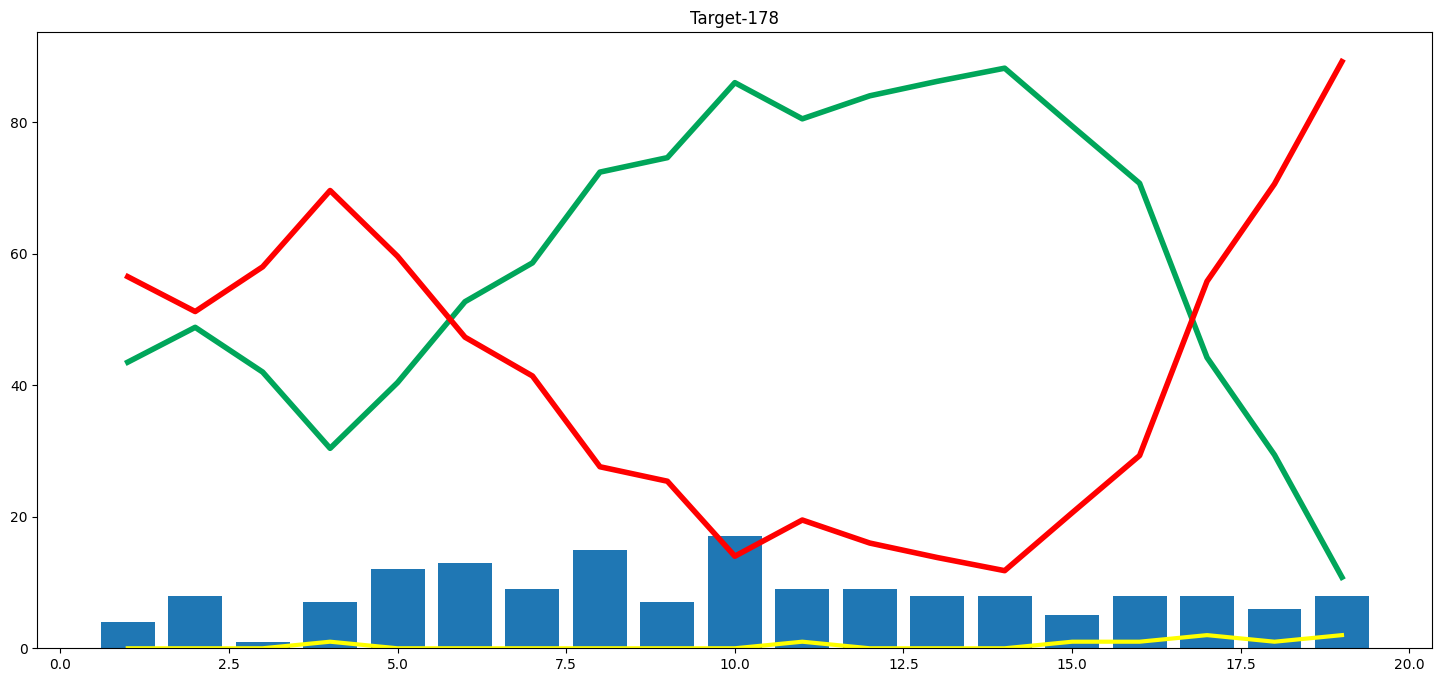

In [120]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [121]:
teams

['Sunrisers Hyderabad',
 'Mumbai Indians',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Kings XI Punjab',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Delhi Capitals']

In [122]:
delivery_df['city'].unique()

array(['Hyderabad', 'Bangalore', 'Mumbai', 'Indore', 'Kolkata', 'Delhi',
       'Chandigarh', 'Jaipur', 'Chennai', 'Cape Town', 'Port Elizabeth',
       'Durban', 'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi', 'Abu Dhabi',
       'Sharjah', nan, 'Mohali', 'Bengaluru'], dtype=object)

In [125]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))